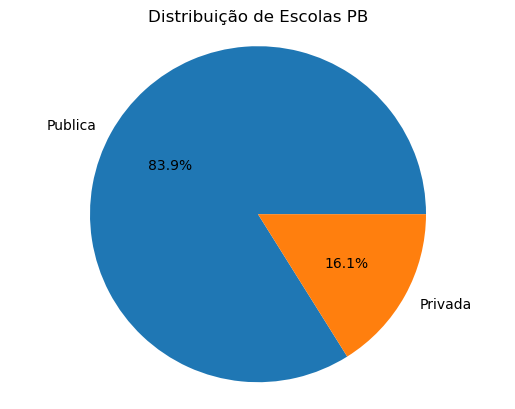

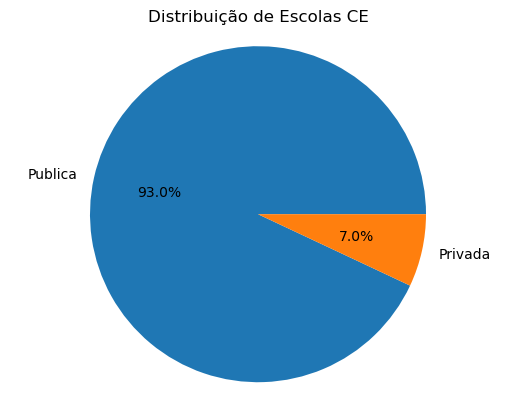

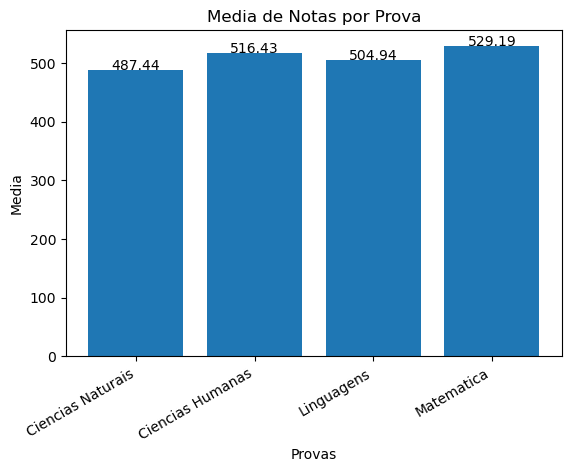

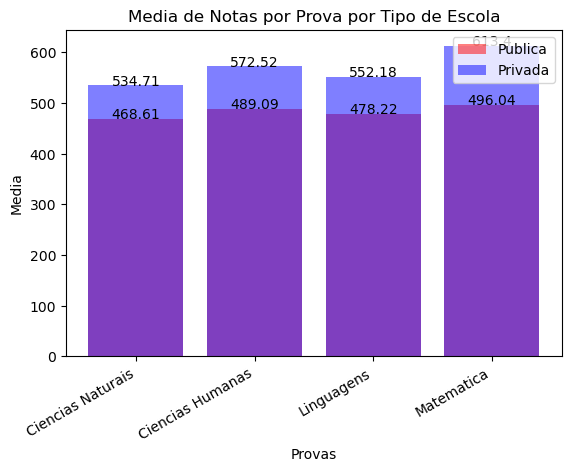

KeyboardInterrupt: 

In [88]:
import _sqlite3
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import PercentFormatter

## Conexao com o Banco de Dados
conn = _sqlite3.connect('ENEM.sqlite')

#Muda o valor da coluna NU_NOTA_MEDIA com a media da soma dos valores das colunas das notas e considera null como 0 (NECESSARIO PARA Inicialização do BD)
#UPDATE MICRODADOS_ENEM_2022 SET NU_NOTA_MEDIA_GERAL = (COALESCE(NU_NOTA_CN, 0) + COALESCE(NU_NOTA_CH, 0) + COALESCE(NU_NOTA_LC, 0) + COALESCE(NU_NOTA_MT, 0) + COALESCE(NU_NOTA_REDACAO, 0)) / 5;

# Exibe a distrubuição de alunos entre escolas publicas e privadas por estado
queryPublica = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_ESCOLA = 2"
queryPrivada = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_ESCOLA = 3"

## Solicita os dados do BD
dataPublica = pd.read_sql_query(queryPublica, conn)
dataPrivada = pd.read_sql_query(queryPrivada, conn)

## Exibe o Grafico PB
fig1, ax1 = plt.subplots()
ax1.pie([dataPublica[dataPublica['SG_UF_PROVA'] == 'PB'].shape[0], dataPrivada[dataPrivada['SG_UF_PROVA'] == 'PB'].shape[0]], labels=['Publica', 'Privada'], autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Distribuição de Escolas PB')
plt.show()

## Exibe o Grafico CE
fig2, ax1 = plt.subplots()
ax1.pie([dataPublica[dataPublica['SG_UF_PROVA'] == 'CE'].shape[0], dataPrivada[dataPrivada['SG_UF_PROVA'] == 'CE'].shape[0]], labels=['Publica', 'Privada'], autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Distribuição de Escolas CE')
plt.show()

# Exibe grafico com média de notas por cada tipo de prova (CN, CH, LC, MT)
queryMediaNotas = "SELECT AVG(NU_NOTA_CN) AS 'Ciencias Naturais', AVG(NU_NOTA_CH) AS 'Ciencias Humanas', AVG(NU_NOTA_LC) AS 'Linguagens', AVG(NU_NOTA_MT) AS 'Matematica' FROM MICRODADOS_ENEM_2022 WHERE TP_PRESENCA_CH = 1 AND TP_PRESENCA_CN = 1 AND TP_PRESENCA_LC = 1 AND TP_PRESENCA_MT = 1"

## Solicita os dados do BD
dataMediaNotas = pd.read_sql_query(queryMediaNotas, conn)

## Exibe o Grafico
fig, ax = plt.subplots()
ax.bar(dataMediaNotas.columns, dataMediaNotas.values[0])
fig.autofmt_xdate()
plt.ylabel('Media')
plt.xlabel('Provas')
plt.title('Media de Notas por Prova')
for i in range(len(dataMediaNotas.columns)):
    plt.text(i, dataMediaNotas.values[0][i], round(dataMediaNotas.values[0][i], 2), ha = 'center')
plt.show()

# Exibe grafico com média de notas por cada tipo de prova (CN, CH, LC, MT) por tipo de escola (publica ou privada)
queryMediaNotasPublica = "SELECT AVG(NU_NOTA_CN) AS 'Ciencias Naturais', AVG(NU_NOTA_CH) AS 'Ciencias Humanas', AVG(NU_NOTA_LC) AS 'Linguagens', AVG(NU_NOTA_MT) AS 'Matematica' FROM MICRODADOS_ENEM_2022 WHERE TP_ESCOLA = 2 AND TP_PRESENCA_CH = 1 AND TP_PRESENCA_CN = 1 AND TP_PRESENCA_LC = 1 AND TP_PRESENCA_MT = 1"
queryMediaNotasPrivada = "SELECT AVG(NU_NOTA_CN) AS 'Ciencias Naturais', AVG(NU_NOTA_CH) AS 'Ciencias Humanas', AVG(NU_NOTA_LC) AS 'Linguagens', AVG(NU_NOTA_MT) AS 'Matematica' FROM MICRODADOS_ENEM_2022 WHERE TP_ESCOLA = 3 AND TP_PRESENCA_CH = 1 AND TP_PRESENCA_CN = 1 AND TP_PRESENCA_LC = 1 AND TP_PRESENCA_MT = 1"

## Solicita os dados do BD
dataMediaNotasPublica = pd.read_sql_query(queryMediaNotasPublica, conn)
dataMediaNotasPrivada = pd.read_sql_query(queryMediaNotasPrivada, conn)

## Exibe o Grafico
fig, ax = plt.subplots()
ax.bar(dataMediaNotasPublica.columns, dataMediaNotasPublica.values[0], label='Publica', alpha=0.5, color='red')
ax.bar(dataMediaNotasPrivada.columns, dataMediaNotasPrivada.values[0], label='Privada', alpha=0.5, color='blue')
fig.autofmt_xdate()
plt.ylabel('Media')
plt.xlabel('Provas')
plt.title('Media de Notas por Prova por Tipo de Escola')
plt.legend(loc='upper right')
for i in range(len(dataMediaNotasPublica.columns)):
    plt.text(i, dataMediaNotasPublica.values[0][i], round(dataMediaNotasPublica.values[0][i], 2), ha = 'center')
    plt.text(i, dataMediaNotasPrivada.values[0][i], round(dataMediaNotasPrivada.values[0][i], 2), ha = 'center')
plt.show()


## Filtrar campo de analise
## Seleciona apenas os estudantes que realizaram as 4 provas
queryMulheresCeara = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_SEXO = 'F' AND SG_UF_PROVA = 'CE' AND TP_PRESENCA_CH = 1 AND TP_PRESENCA_CN = 1 AND TP_PRESENCA_LC = 1 AND TP_PRESENCA_MT = 1"
queryMulheresParaiba = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_SEXO = 'F' AND SG_UF_PROVA = 'PB' AND TP_PRESENCA_CH = 1 AND TP_PRESENCA_CN = 1 AND TP_PRESENCA_LC = 1 AND TP_PRESENCA_MT = 1"

## Solicita os dados do BD
dataMulheresCE = pd.read_sql_query(queryMulheresCeara, conn)
dataMulheresPB = pd.read_sql_query(queryMulheresParaiba, conn)

## Formatar o eixo y para porcetagem (0 a 100%)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

## Grafico de frequencia de nota mais comum
plt.hist([ dataMulheresPB['NU_NOTA_MEDIA_GERAL'], dataMulheresCE['NU_NOTA_MEDIA_GERAL']], bins=30, density=True, label=['PB', 'CE'], edgecolor='black')
plt.legend(loc='upper right')
plt.ylabel('Frequencia')
plt.xlabel('Notas')
plt.title('(PB - CE) Comparação entre notas Mulheres ENEM 2022')
plt.show()

# Imprime quantidade de mulheres que tira nota 1000 na redação
print("Mulheres (PB) Nota 1000 Redação: ", dataMulheresPB[dataMulheresPB['NU_NOTA_REDACAO'] == 1000].shape[0])
print("Mulheres (CE) Nota 1000 Redação: ", dataMulheresCE[dataMulheresCE['NU_NOTA_REDACAO'] == 1000].shape[0])

# Exibe Grafico Pizza com a quantidade de notas por intervalo 
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000']
sizesPB = [dataMulheresPB[dataMulheresPB['NU_NOTA_MEDIA_GERAL'] < 200].shape[0], 
           dataMulheresPB[(dataMulheresPB['NU_NOTA_MEDIA_GERAL'] >= 200) & (dataMulheresPB['NU_NOTA_MEDIA_GERAL'] < 400)].shape[0],
           dataMulheresPB[(dataMulheresPB['NU_NOTA_MEDIA_GERAL'] >= 400) & (dataMulheresPB['NU_NOTA_MEDIA_GERAL'] < 600)].shape[0],
           dataMulheresPB[(dataMulheresPB['NU_NOTA_MEDIA_GERAL'] >= 600) & (dataMulheresPB['NU_NOTA_MEDIA_GERAL'] < 800)].shape[0],
           dataMulheresPB[dataMulheresPB['NU_NOTA_MEDIA_GERAL'] >= 800].shape[0]]
sizesCE = [dataMulheresCE[dataMulheresCE['NU_NOTA_MEDIA_GERAL'] < 200].shape[0], 
           dataMulheresCE[(dataMulheresCE['NU_NOTA_MEDIA_GERAL'] >= 200) & (dataMulheresCE['NU_NOTA_MEDIA_GERAL'] < 400)].shape[0],
           dataMulheresCE[(dataMulheresCE['NU_NOTA_MEDIA_GERAL'] >= 400) & (dataMulheresCE['NU_NOTA_MEDIA_GERAL'] < 600)].shape[0],
           dataMulheresCE[(dataMulheresCE['NU_NOTA_MEDIA_GERAL'] >= 600) & (dataMulheresCE['NU_NOTA_MEDIA_GERAL'] < 800)].shape[0],
           dataMulheresCE[dataMulheresCE['NU_NOTA_MEDIA_GERAL'] >= 800].shape[0]]

# Exibe o Grafico PB
fig1, ax1 = plt.subplots()
ax1.pie(sizesPB, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Distribuição de Notas Mulheres PB')
plt.show()

# Exibe o Grafico CE
fig2, ax1 = plt.subplots()
ax1.pie(sizesCE, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Distribuição de Notas Mulheres CE')
plt.show()


## Seleciona apenas os estudantes Homens que realizaram as 4 provas
queryHomensCeara = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_SEXO = 'M' AND SG_UF_PROVA = 'CE' AND TP_PRESENCA_CH = 1 AND TP_PRESENCA_CN = 1 AND TP_PRESENCA_LC = 1 AND TP_PRESENCA_MT = 1"
queryHomensParaiba = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_SEXO = 'M' AND SG_UF_PROVA = 'PB' AND TP_PRESENCA_CH = 1 AND TP_PRESENCA_CN = 1 AND TP_PRESENCA_LC = 1 AND TP_PRESENCA_MT = 1"

## Solicita os dados do BD
dataHomensCE = pd.read_sql_query(queryHomensCeara, conn)
dataHomensPB = pd.read_sql_query(queryHomensParaiba, conn)

## Formatar o eixo y para porcetagem (0 a 100%)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

## Grafico de frequencia de nota mais comum
plt.hist([ dataHomensPB['NU_NOTA_MEDIA_GERAL'], dataHomensCE['NU_NOTA_MEDIA_GERAL']], bins=30, density=True, label=['PB', 'CE'], edgecolor='black')
plt.legend(loc='upper right')
plt.ylabel('Frequencia')
plt.xlabel('Notas')
plt.title('(PB - CE) Comparação entre notas Homens ENEM 2022')
plt.show()

# Exibe Grafico com a quantidade de notas por intervalo
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000']
sizesPB = [dataHomensPB[dataHomensPB['NU_NOTA_MEDIA_GERAL'] < 200].shape[0], 
           dataHomensPB[(dataHomensPB['NU_NOTA_MEDIA_GERAL'] >= 200) & (dataHomensPB['NU_NOTA_MEDIA_GERAL'] < 400)].shape[0],
           dataHomensPB[(dataHomensPB['NU_NOTA_MEDIA_GERAL'] >= 400) & (dataHomensPB['NU_NOTA_MEDIA_GERAL'] < 600)].shape[0],
           dataHomensPB[(dataHomensPB['NU_NOTA_MEDIA_GERAL'] >= 600) & (dataHomensPB['NU_NOTA_MEDIA_GERAL'] < 800)].shape[0],
           dataHomensPB[dataHomensPB['NU_NOTA_MEDIA_GERAL'] >= 800].shape[0]]
sizesCE = [dataHomensCE[dataHomensCE['NU_NOTA_MEDIA_GERAL'] < 200].shape[0],
              dataHomensCE[(dataHomensCE['NU_NOTA_MEDIA_GERAL'] >= 200) & (dataHomensCE['NU_NOTA_MEDIA_GERAL'] < 400)].shape[0],
              dataHomensCE[(dataHomensCE['NU_NOTA_MEDIA_GERAL'] >= 400) & (dataHomensCE['NU_NOTA_MEDIA_GERAL'] < 600)].shape[0],
              dataHomensCE[(dataHomensCE['NU_NOTA_MEDIA_GERAL'] >= 600) & (dataHomensCE['NU_NOTA_MEDIA_GERAL'] < 800)].shape[0],
              dataHomensCE[dataHomensCE['NU_NOTA_MEDIA_GERAL'] >= 800].shape[0]]

# Exibe o Grafico PB
fig1, ax1 = plt.subplots()
ax1.pie(sizesPB, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Distribuição de Notas Homens PB')
plt.show()

# Exibe o Grafico CE
fig2, ax1 = plt.subplots()
ax1.pie(sizesCE, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Distribuição de Notas Homens CE')
plt.show()

# Imprime quantidade de homens que tira nota 1000 na redação
print("Homens (PB) Nota 1000 Redação: ", dataHomensPB[dataHomensPB['NU_NOTA_REDACAO'] == 1000].shape[0])
print("Homens (CE) Nota 1000 Redação: ", dataHomensCE[dataHomensCE['NU_NOTA_REDACAO'] == 1000].shape[0])

# Exibe quais cidades tem maiores notas 
print("Cidades com maiores notas Homens PB: ", dataHomensPB.groupby('NO_MUNICIPIO_PROVA')['NU_NOTA_MEDIA_GERAL'].max().nlargest(3))
print("Cidades com maiores notas Homens CE: ", dataHomensCE.groupby('NO_MUNICIPIO_PROVA')['NU_NOTA_MEDIA_GERAL'].max().nlargest(3))

# Exibe quais cidades tem menores notas
print("Cidades com menores notas Homens PB: ", dataHomensPB[dataHomensPB['NU_NOTA_MEDIA_GERAL'] > 0].groupby('NO_MUNICIPIO_PROVA')['NU_NOTA_MEDIA_GERAL'].min().nsmallest(3))
print("Cidades com menores notas Homens CE: ", dataHomensCE[dataHomensCE['NU_NOTA_MEDIA_GERAL'] > 0].groupby('NO_MUNICIPIO_PROVA')['NU_NOTA_MEDIA_GERAL'].min().nsmallest(3))

# Exibe quais cidades tem maiores notas
print("Cidades com maiores notas Mulheres PB: ", dataMulheresPB.groupby('NO_MUNICIPIO_PROVA')['NU_NOTA_MEDIA_GERAL'].max().nlargest(3))
print("Cidades com maiores notas Mulheres CE: ", dataMulheresCE.groupby('NO_MUNICIPIO_PROVA')['NU_NOTA_MEDIA_GERAL'].max().nlargest(3))

# Exibe quais cidades tem menores notas
print("Cidades com menores notas Mulheres PB: ", dataMulheresPB[dataMulheresPB['NU_NOTA_MEDIA_GERAL'] > 0].groupby('NO_MUNICIPIO_PROVA')['NU_NOTA_MEDIA_GERAL'].min().nsmallest(3))
print("Cidades com menores notas Mulheres CE: ", dataMulheresCE[dataMulheresCE['NU_NOTA_MEDIA_GERAL'] > 0].groupby('NO_MUNICIPIO_PROVA')['NU_NOTA_MEDIA_GERAL'].min().nsmallest(3))


# Distribuir notas por tipo de escola (publica ou privada) sem distinção de sexo
queryPublica = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_ESCOLA = 2 AND TP_PRESENCA_CH = 1 AND TP_PRESENCA_CN = 1 AND TP_PRESENCA_LC = 1 AND TP_PRESENCA_MT = 1"
queryPrivada = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_ESCOLA = 3 AND TP_PRESENCA_CH = 1 AND TP_PRESENCA_CN = 1 AND TP_PRESENCA_LC = 1 AND TP_PRESENCA_MT = 1"

## Solicita os dados do BD
dataPublica = pd.read_sql_query(queryPublica, conn)
dataPrivada = pd.read_sql_query(queryPrivada, conn)

## Formatar o eixo y para porcetagem (0 a 100%)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

## Grafico de frequencia de nota mais comum
plt.hist([ dataPublica['NU_NOTA_MEDIA_GERAL'], dataPrivada['NU_NOTA_MEDIA_GERAL']], bins=30, density=True, label=['Publica', 'Privada'], edgecolor='black')
plt.legend(loc='upper right')
plt.ylabel('Frequencia')
plt.xlabel('Notas')
plt.title('(Publica - Privada) Comparação entre notas ENEM 2022')
plt.show()

# Distribuir notas por tipo de escola (publica ou privada) com distinção de estado
queryPublicaCE = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_ESCOLA = 2 AND SG_UF_PROVA = 'CE' AND TP_PRESENCA_CH = 1 AND TP_PRESENCA_CN = 1 AND TP_PRESENCA_LC = 1 AND TP_PRESENCA_MT = 1"
queryPrivadaCE = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_ESCOLA = 3 AND SG_UF_PROVA = 'CE' AND TP_PRESENCA_CH = 1 AND TP_PRESENCA_CN = 1 AND TP_PRESENCA_LC = 1 AND TP_PRESENCA_MT = 1"
queryPublicaPB = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_ESCOLA = 2 AND SG_UF_PROVA = 'PB' AND TP_PRESENCA_CH = 1 AND TP_PRESENCA_CN = 1 AND TP_PRESENCA_LC = 1 AND TP_PRESENCA_MT = 1"
queryPrivadaPB = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_ESCOLA = 3 AND SG_UF_PROVA = 'PB' AND TP_PRESENCA_CH = 1 AND TP_PRESENCA_CN = 1 AND TP_PRESENCA_LC = 1 AND TP_PRESENCA_MT = 1"

## Solicita os dados do BD
dataPublicaCE = pd.read_sql_query(queryPublicaCE, conn)
dataPrivadaCE = pd.read_sql_query(queryPrivadaCE, conn)
dataPublicaPB = pd.read_sql_query(queryPublicaPB, conn)
dataPrivadaPB = pd.read_sql_query(queryPrivadaPB, conn)

## Formatar o eixo y para porcetagem (0 a 100%)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

## Grafico de frequencia de nota mais comum
plt.hist([ dataPublicaCE['NU_NOTA_MEDIA_GERAL'], dataPrivadaCE['NU_NOTA_MEDIA_GERAL']], bins=30, density=True, label=['Publica CE', 'Privada CE'], edgecolor='black')
plt.legend(loc='upper right')
plt.ylabel('Frequencia')
plt.xlabel('Notas')
plt.title('(Publica - Privada) Comparação entre notas CE ENEM 2022')
plt.show()

## Grafico de frequencia de nota mais comum
plt.hist([ dataPublicaPB['NU_NOTA_MEDIA_GERAL'], dataPrivadaPB['NU_NOTA_MEDIA_GERAL']], bins=30, density=True, label=['Publica PB', 'Privada PB'], edgecolor='black')
plt.legend(loc='upper right')
plt.ylabel('Frequencia')
plt.xlabel('Notas')
plt.title('(Publica - Privada) Comparação entre notas PB ENEM 2022')
plt.show()


# Melhores notas por tipo de escola (publica ou privada) e estado
print("Maior nota Publica CE: ", dataPublicaCE['NU_NOTA_MEDIA_GERAL'].max())
print("Maior nota Privada CE: ", dataPrivadaCE['NU_NOTA_MEDIA_GERAL'].max())
print("Maior nota Publica PB: ", dataPublicaPB['NU_NOTA_MEDIA_GERAL'].max())
print("Maior nota Privada PB: ", dataPrivadaPB['NU_NOTA_MEDIA_GERAL'].max())

# Grafico nota por faixa etaria
queryFaixaEtaria = "SELECT * FROM MICRODADOS_ENEM_2022 WHERE TP_PRESENCA_CH = 1 AND TP_PRESENCA_CN = 1 AND TP_PRESENCA_LC = 1 AND TP_PRESENCA_MT = 1"
dataFaixaEtaria = pd.read_sql_query(queryFaixaEtaria, conn)

## Grafico de frequencia de nota mais comum
plt.hist(dataFaixaEtaria['TP_FAIXA_ETARIA'], bins=20, density=True, edgecolor='black')
plt.ylabel('Frequencia')
plt.xlabel('Faixa Etaria')
plt.title('Distribuição de Notas por Faixa Etaria')
plt.show()

# Fechar conexao com o banco de dados
conn.close()